# Etude sur le dataset finance projet3


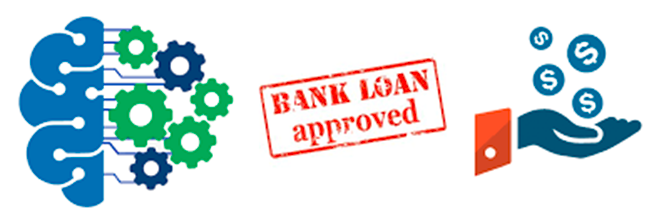
_________________


    -Variable Description
    -Loan_ID Unique Loan ID - Il s'agit de l'identifiant unique 
    -Gender - Male/ Female - Il s'agit du genre Male/Female pour Homme et Femme
    -Married - Applicant married (Y/N) - Il s'agit de savoir si la personne est mariée ou non
    -Dependents - Number of dependents - Il s'agit du Nombre de personnes à charge
    -Education - Applicant Education (Graduate/ Under Graduate) - Formation du candidat (diplômé/non diplômé)
    -Self_Employed - Self employed (Y/N) - Travailleurs indépendants (Oui/Non)
    -ApplicantIncome - Applicant income - Revenu du demandeur
    -CoapplicantIncome - Coapplicant income - Revenu d'un second demandeur
    -LoanAmount - Loan amount in thousands - Montant du prêt en milliers
    -Loan_Amount_Term - Term of loan in months - Durée du prêt en mois
    -Credit_History - credit history meets guidelines - les antécédents de crédit répondent aux lignes directrices
    -Property_Area - Urban/ Semi Urban/ Rural - Zone_de_propriété (Urbain/ Semi-urbain/ Rural)
    -Loan_Status - Loan approved (Y/N) - Prêt approuvé (O/N)
    
____________________

L'Etude des de savoir si un pret peut être accordé en fonction des parametres d'entrées, 
On est donc dans un problème lié à la classification
Nous allons commencer par étudier les données, les visualiser et les nettoyer le dataset
Ensuite nous nous pencherons sur les différents algorithme de classification
Puis nous continuerons par afficher les etrics pertinents et tirer les conclusions de l'étude




### <center>  Exploration de données </center>

In [262]:
# importer les librairie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as mno


In [263]:
# importer les données
df = pd.read_csv("datasets/train.csv", delimiter = ",")
df_test = pd.read_csv("datasets/test.csv", delimiter = ",")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [264]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [266]:
numeric_features = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = df.iloc[:, 0:12].select_dtypes(include = ['object']).columns

print("Numeric features:", numeric_features.to_list())
print("Categorical features:", categorical_features.to_list())

Numeric features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [267]:
# Compter le nombre de valeurs null par colonne dans le dataset
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

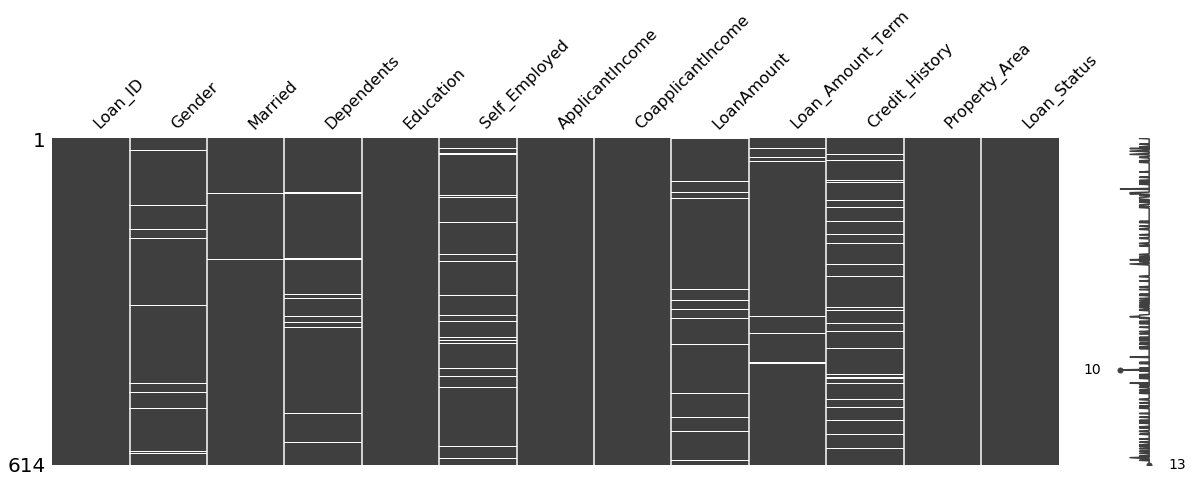

In [268]:
#On peut voir que les données manquantes ne sont pas très nombreuses
mno.matrix(df, figsize = (20, 6))

In [269]:
#Suppression de la colonne Loan_ID
df = df.drop("Loan_ID", axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### <center>  Visualisation de données </center>

In [270]:
tab_numeric = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i in tab_numeric:
    values = df[i].value_counts(normalize = True)
    print(values)

2500    0.014658
4583    0.009772
2600    0.009772
6000    0.009772
5000    0.008143
          ...   
5818    0.001629
5819    0.001629
5821    0.001629
2750    0.001629
3691    0.001629
Name: ApplicantIncome, Length: 505, dtype: float64
0.0       0.444625
1666.0    0.008143
2083.0    0.008143
2500.0    0.008143
1750.0    0.004886
            ...   
7166.0    0.001629
2138.0    0.001629
2166.0    0.001629
3541.0    0.001629
3021.0    0.001629
Name: CoapplicantIncome, Length: 287, dtype: float64
120.0    0.033784
110.0    0.028716
100.0    0.025338
187.0    0.020270
160.0    0.020270
           ...   
570.0    0.001689
300.0    0.001689
376.0    0.001689
117.0    0.001689
311.0    0.001689
Name: LoanAmount, Length: 203, dtype: float64
360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64
1.0    0.842199
0.0    0.157801
Name:

In [271]:
tab_categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i in tab_categorical:
    values = df[i].value_counts(normalize = True)
    print(values)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


In [272]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
def tripleviz(dataframe):
    for col in dataframe[columns]:   


        mu = dataframe[col].mean()
        median = np.median(dataframe[col])
        sigma = dataframe[col].std()
        name = dataframe[col].name

        fig = plt.figure()

        fig.suptitle('Visualisation et analyse de la colonne '+ name , fontsize=14, fontweight='bold')

        ax = fig.add_subplot(133)
        fig.subplots_adjust(top=0.85)
        ax.text(2, 8, 'Les chiffres clés', style='italic',
                bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


        ax.text(2, 6, r'$\mu=%.2f$' % (mu, ), fontsize=15)
        ax.text(2, 4, r'$\mathrm{median}=%.2f$' % (median, ), fontsize=15)
        ax.text(2, 2, r'$\sigma=%.2f$' % (sigma, ), fontsize=15)

        ax.axis([0, 10, 0, 10])



        plt.subplot(131), sns.distplot(dataframe[col])
        plt.subplot(132), dataframe[col].plot.box(figsize=(16,5))




        plt.show()

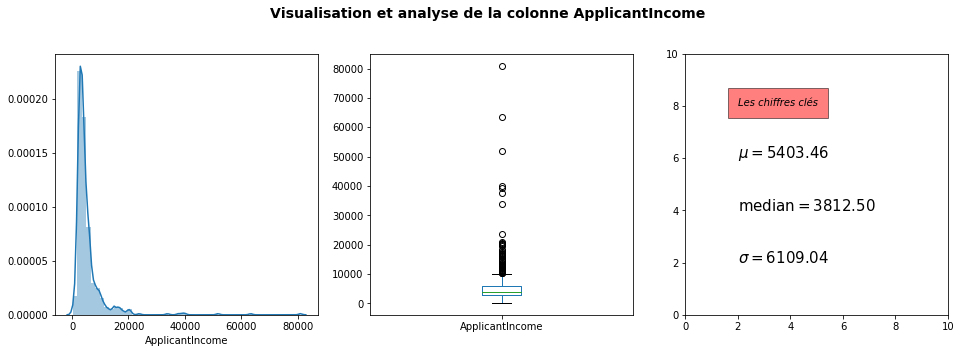

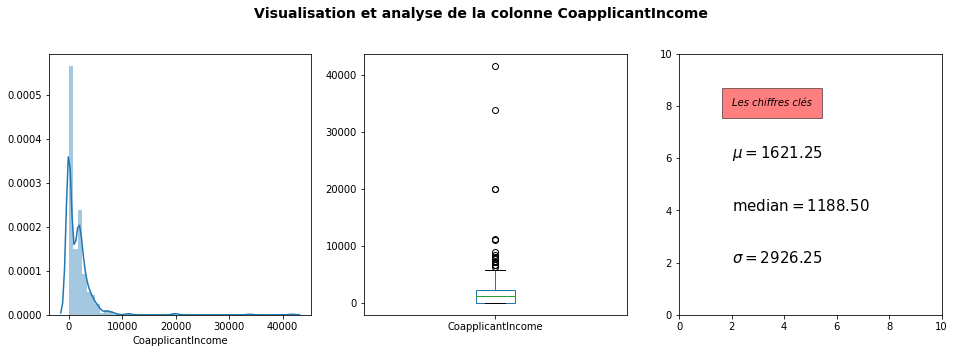

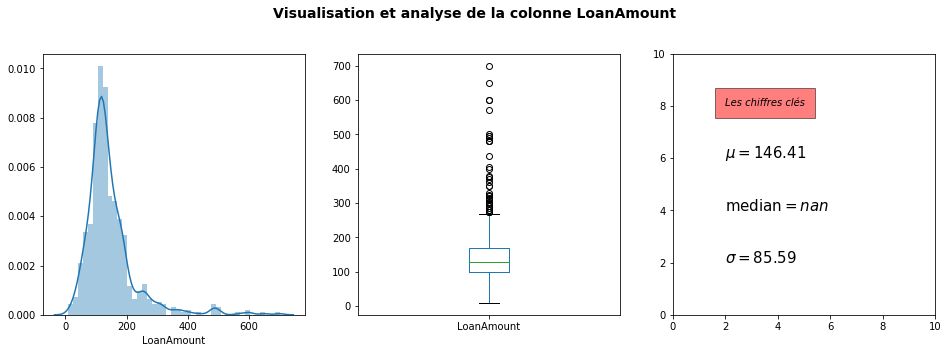

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

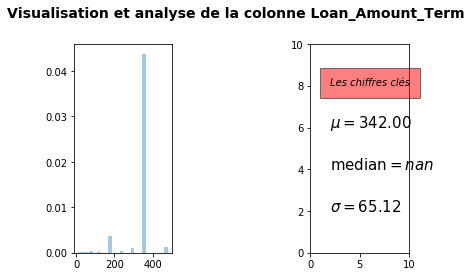

In [273]:
tripleviz(df)

Gender


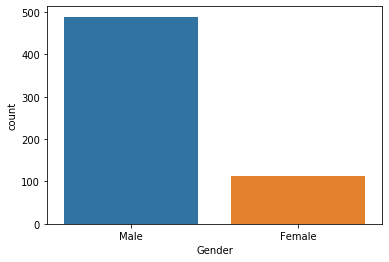

Married


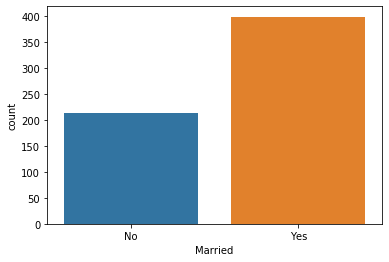

Dependents


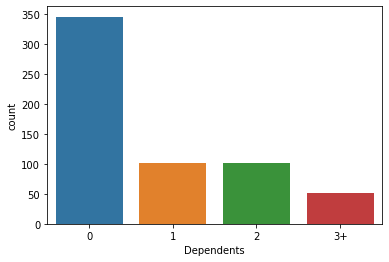

Self_Employed


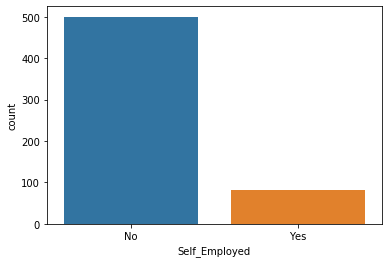

Credit_History


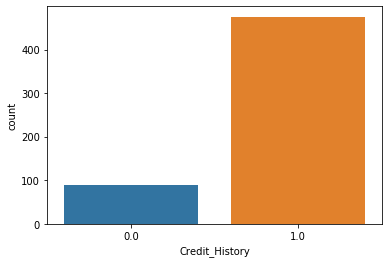

In [274]:
#Visualisation des variables de catégories Nominales
tab = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for i in tab:
    print(i)
    sns.countplot(x= i, data = dataset)
    plt.show()

Dependents


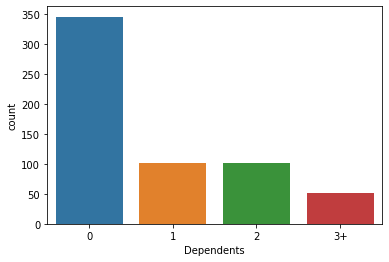

Education


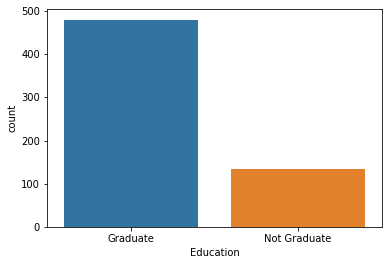

Property_Area


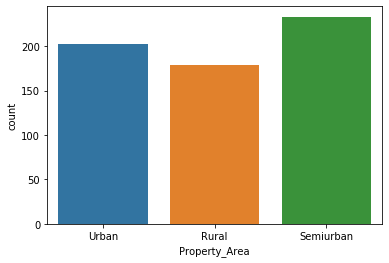

In [275]:
#Visualisation des variables de catégories Ordinales
tab = ['Dependents', 'Education', 'Property_Area']
for i in tab:
    print(i)
    sns.countplot(x= i, data = dataset)
    plt.show()

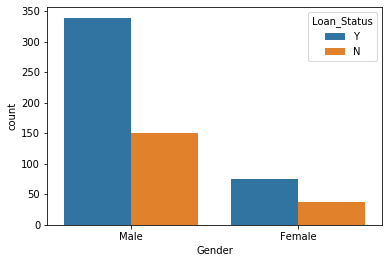

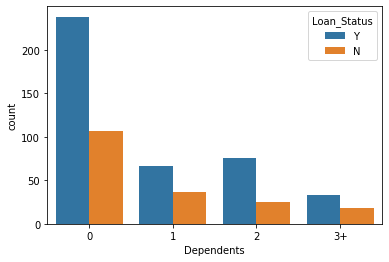

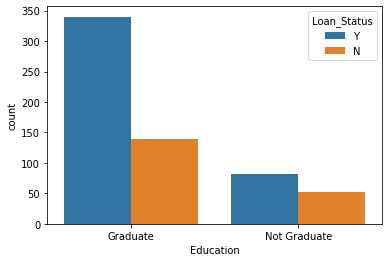

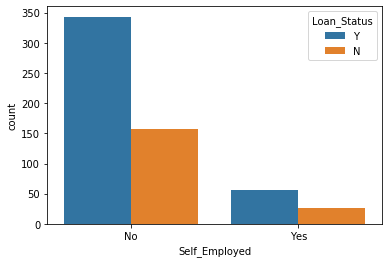

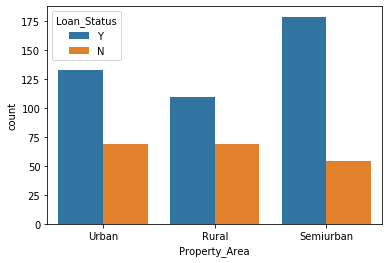

In [276]:
sns.countplot(df['Gender'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Dependents'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Education'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])
plt.show()

sns.countplot(df['Property_Area'], hue=df['Loan_Status'])
plt.show()

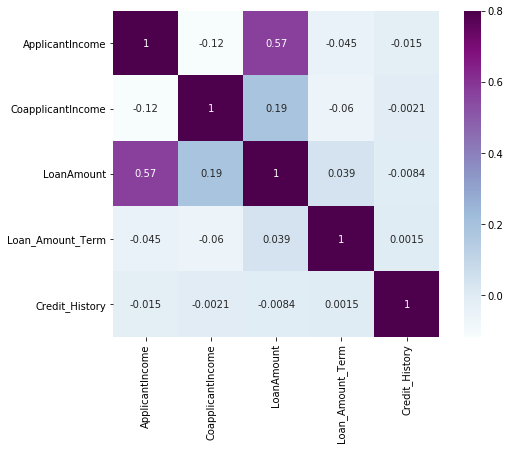

In [277]:
#Mise en place de tableau de corrélation

corr_matrix = df[numeric_features].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, vmax=.8, annot=True, square=True, cmap="BuPu");

________________________________________________

### <center> Mise en place partie machine learning </center>

________________________________


In [278]:
# importer les packages machine learning


In [279]:
# création d'un df en supprimant toutes les lignes contenant des valeurs manquantes
df_clean = df.dropna()
df_clean

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [281]:
df = pd.get_dummies(df_clean.iloc[:, 0 : -1])
df["Loan_Status"] = df_clean.iloc[:, -1]
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,N
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,Y
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,Y
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,Y
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,Y
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,Y
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,Y
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,Y


In [284]:
df.shape

(480, 21)